In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/mac/Desktop/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Axes: xlabel='Gender'>

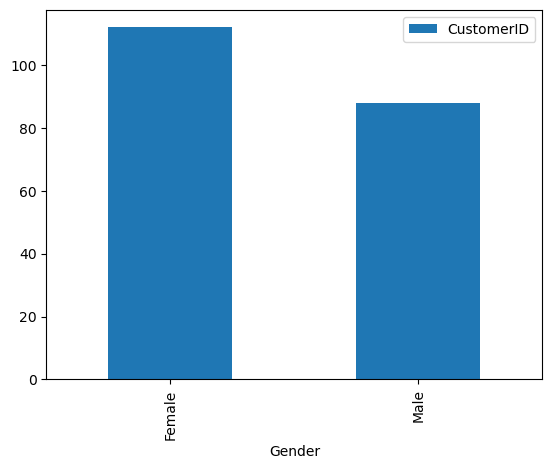

In [3]:
data.groupby('Gender')['CustomerID'].count().reset_index().plot(kind = 'bar', x = 'Gender', y = 'CustomerID')

<Axes: ylabel='Frequency'>

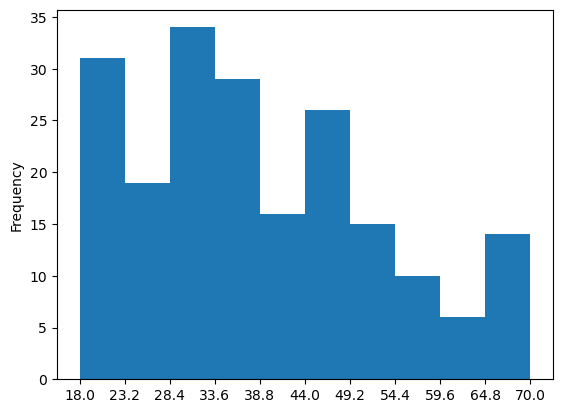

In [4]:
count, bins = np.histogram(data['Age'], bins = 10)
data['Age'].plot(kind = 'hist', xticks = bins)

<Axes: ylabel='Frequency'>

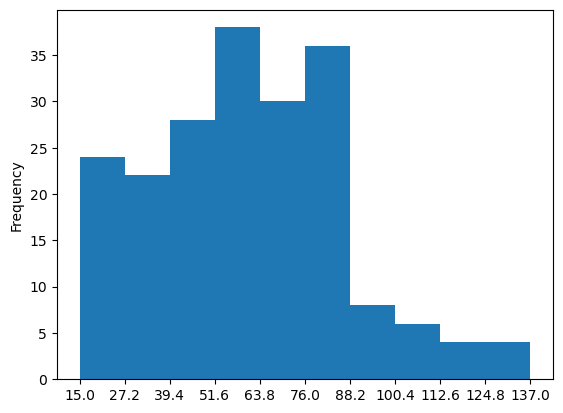

In [5]:
count, bins = np.histogram(data['Annual Income (k$)'], bins = 10)
data['Annual Income (k$)'].plot(kind = 'hist', xticks = bins)

<Axes: ylabel='Frequency'>

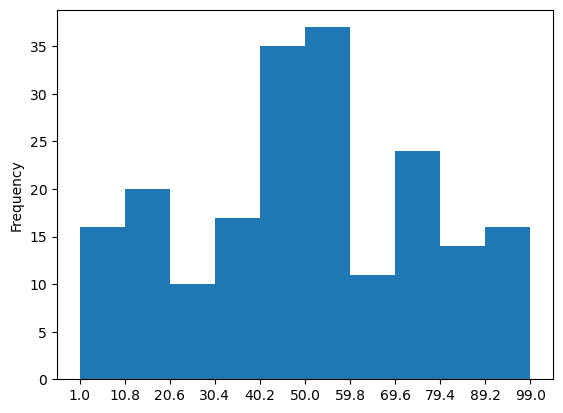

In [6]:
count, bins = np.histogram(data['Spending Score (1-100)'], bins = 10)
data['Spending Score (1-100)'].plot(kind = 'hist', xticks = bins)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

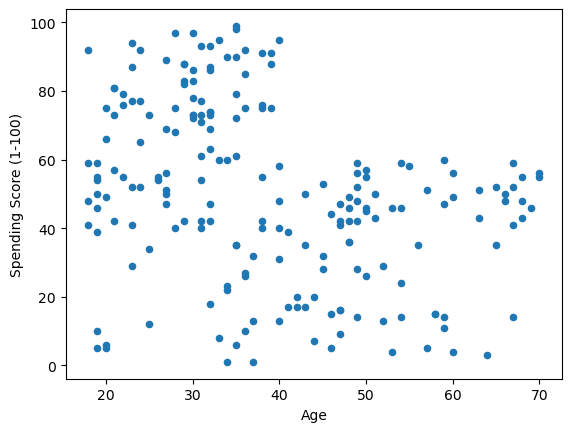

In [7]:
data.plot(kind = 'scatter', x = 'Age', y = 'Spending Score (1-100)')

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

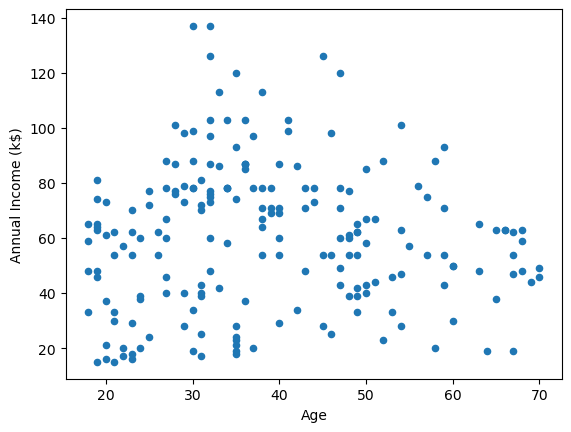

In [8]:
data.plot(kind = 'scatter', x = 'Age', y = 'Annual Income (k$)')

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

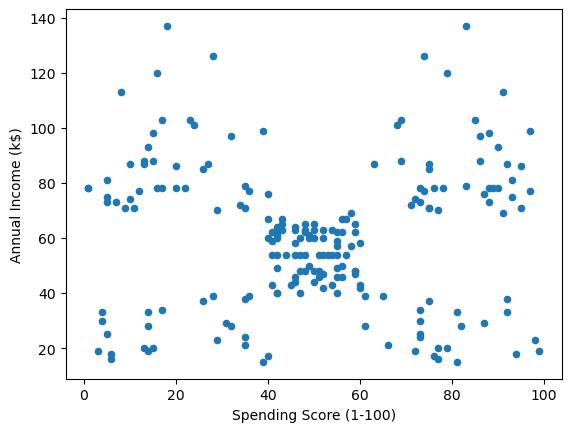

In [9]:
data.plot(kind = 'scatter', x = 'Spending Score (1-100)', y = 'Annual Income (k$)')

In [10]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [12]:
data.rename(columns = {'Spending Score (1-100)' : 'Spending Score'}, inplace = True)
data.rename(columns = {'Annual Income (k$)' : 'Annual Income'}, inplace = True)

In [13]:
gender = pd.get_dummies(data['Gender'])
data = pd.concat([data, gender], axis = 1)
data.drop(columns = ['Gender'], inplace = True)

In [14]:
def find_closest_centroid(X, centroids):
    K = centroids.shape[0]
    m = X.shape[0]
    index = np.zeros(X.shape[0])
    
    for i in range(m):
        # Create a list to store distance between i th row of X and j th row of centroids
        distance = []
        for j in range(K):
            # Calculate distance between i th row of X and j th row of centroids
            distance.append(np.linalg.norm(X[i] - centroids[j]))
        # Find smallest distance from i th row of X to j th row of centroids
        index[i] = np.argmin(distance)
    return index

In [15]:
data

,CustomerID,Age,Annual Income,Spending Score,Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [16]:
centroids = np.array([[15, 39], [15, 81], [50, 55], [80, 20], [100, 100]])
X = np.array(data[['Annual Income', 'Spending Score']])
index = find_closest_centroid(X, centroids)
index

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 2., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 2., 1., 2., 2., 0., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 4., 3., 2., 3., 4., 3., 2., 3., 2., 3., 2., 3., 4.,
       3., 2., 3., 2., 3., 4., 3., 4., 3., 4., 3., 2., 3., 4., 3., 4., 3.,
       4., 3., 4., 3., 4., 3., 2., 3., 4., 3., 4., 3., 4., 3., 4., 3., 2.,
       3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3.,
       4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4.])

In [17]:
def compute_new_centroid(X, index, K):
    n = X.shape[1]
    new_centroid = np.zeros((K, n))
    
    for i in range(K):
        # Grouping j th row of X, which have the same index
        points = X[index == i]
        new_centroid[i] = np.mean(points, axis = 0)
    return new_centroid

In [18]:
compute_new_centroid(X, index, 5)

array([[25.14285714, 19.52380952],
       [24.95      , 81.        ],
       [55.79120879, 52.21978022],
       [87.        , 18.63157895],
       [90.06666667, 85.        ]])

Text(90.06666667, 85, 'High Income, High Score')

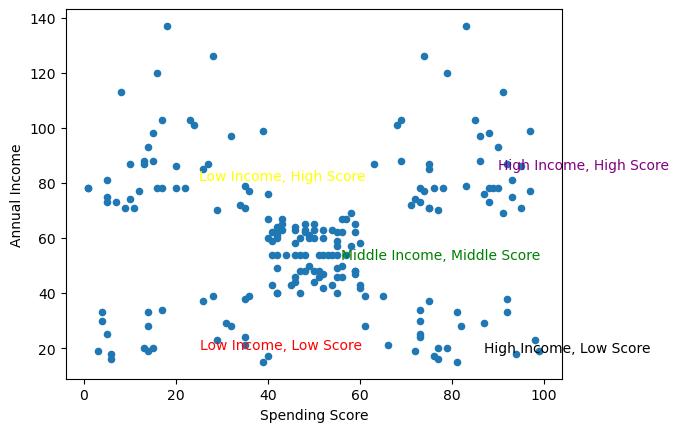

In [23]:
data.plot(kind = 'scatter', x = 'Spending Score', y = 'Annual Income')
plt.text(25.14285714, 19.52380952, 'Low Income, Low Score', color = 'r')
plt.text(24.95, 81, 'Low Income, High Score', color = 'yellow')
plt.text(55.79120879, 52.21978022, 'Middle Income, Middle Score', color = 'green')
plt.text(87, 18.63157895, 'High Income, Low Score', color = 'black')
plt.text(90.06666667, 85, 'High Income, High Score', color = 'purple')

In [20]:
cluster = pd.DataFrame(index.reshape(data.shape[0], 1), columns = ['Cluster'])
data = pd.concat([data, cluster], axis = 1)
data.head()

,CustomerID,Age,Annual Income,Spending Score,Female,Male,Cluster
0,1,19,15,39,0,1,0.0
1,2,21,15,81,0,1,1.0
2,3,20,16,6,1,0,0.0
3,4,23,16,77,1,0,1.0
4,5,31,17,40,1,0,0.0


In [21]:
for i in data['Cluster']:
    if i == 0:
        data['Cluster'].replace(0, 'Low Income, Low Score', inplace = True)
    elif i == 1:
        data['Cluster'].replace(1, 'Low Income, High Score', inplace = True)
    elif i == 2:
        data['Cluster'].replace(2, 'Middle Income, Middle Score', inplace = True)
    elif i == 3:
        data['Cluster'].replace(3, 'High Income, Low Score', inplace = True)
    elif i == 4:
        data['Cluster'].replace(4, 'High Income, High Score', inplace = True)

In [22]:
data.head()

,CustomerID,Age,Annual Income,Spending Score,Female,Male,Cluster
0,1,19,15,39,0,1,"Low Income, Low Score"
1,2,21,15,81,0,1,"Low Income, High Score"
2,3,20,16,6,1,0,"Low Income, Low Score"
3,4,23,16,77,1,0,"Low Income, High Score"
4,5,31,17,40,1,0,"Low Income, Low Score"
